# Motivação:

O cientista de dados é contratado para resolver problemas! E um dos problemas mais comuns no mundo real são as regressões. Um problema pode ser modelado como sendo uma regressão quando queremos prever um número real, ou, mais tecnicamente: quando queremos prever uma variável contínua.

A ideia desse projeto é iniciar no mundo de machine learning, com separação de bases, avaliação de métricas, uso de cross validation e, finalmente, criação e comparação de modelos preditivos utilizando a biblioteca scikit learn.

# Objeto de Estudo:
    
Vamos trabalhar com informações de planos de saúde! A área médica e de seguradoras de saúde utiliza muito as técnicas de ciência de dados e machine learning para avaliar risco dos seus segurados/pacientes. Vamos utilizar uma base de dados do livro ["Machine Learning with R"](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-r) de Brett Lantz, disponível [aqui](https://github.com/stedy/Machine-Learning-with-R-datasets).

O problema que queremos solucionar é prever os gastos com planos de saúde de acordo com as características do segurado. Poderia ser um problema interessante tanto para os segurados (para saber quais características tornam seu plano mais caro ou barato), quanto para seguradoras (para que mantenha suas contas equilibradas e saiba os segurados que devem ter um preço mais alto/baixo).

# Bibliotecas:

In [1]:
import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
import seaborn            as sns 
import statsmodels.api    as sm
import os 

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import MinMaxScaler , StandardScaler
from sklearn.linear_model     import LinearRegression 
from sklearn.tree             import DecisionTreeRegressor
from sklearn.model_selection  import cross_val_score
from sklearn.metrics          import r2_score

# Configurando pandas para mostrar todas as linhas e colunas:

pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)

# Configurando pandas para não mostrar notação cientifica para números:

pd.set_option('display.float_format' , lambda x: '%.2f' % x)

# Importação:

In [2]:
df_seguro = pd.read_csv('insurance.csv')

# Descrição dos Dados:

In [3]:
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
print('Linhas: ', df_seguro.shape[0])
print('Colunas: ' , df_seguro.shape[1])

Linhas:  1338
Colunas:  7


In [5]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Estatística Descritiva:

In [6]:
df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


<Figure size 432x288 with 0 Axes>

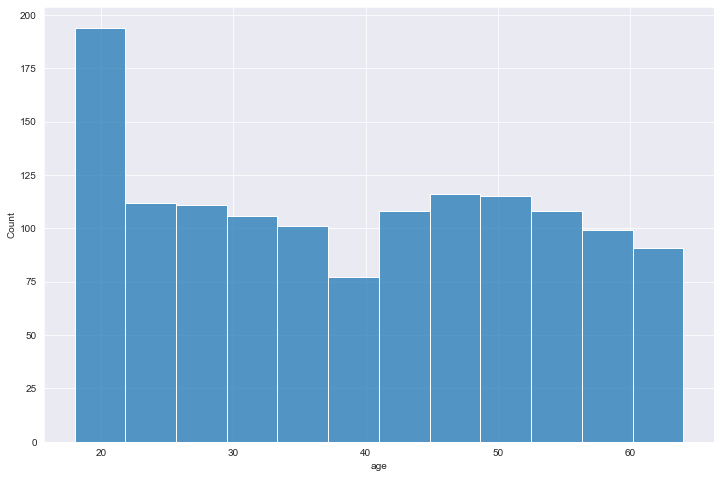

In [7]:
# Analisando as distribuições das idades:

sns.set_style( "darkgrid" )

plt.tight_layout()

fig = plt.figure( figsize = ( 12 , 8 ) )

sns.histplot( data = df_seguro , x = 'age' );

plt.show();

<Figure size 432x288 with 0 Axes>

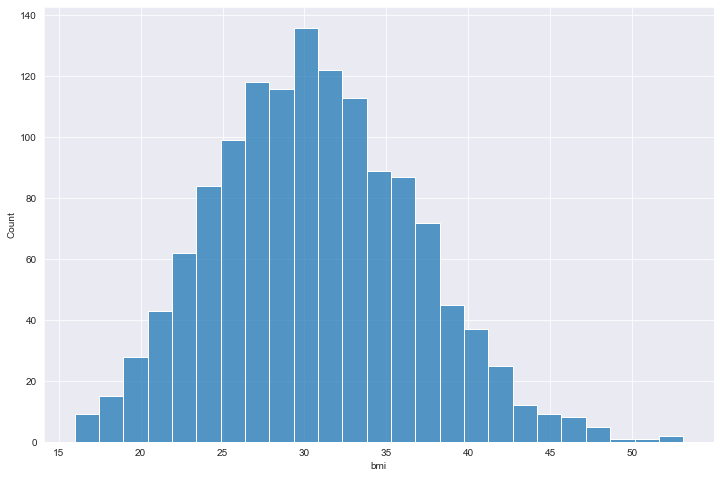

In [8]:
# Analisando as distribuições do índice de massa corporal:

sns.set_style( "darkgrid" )

plt.tight_layout()

fig = plt.figure( figsize = ( 12 , 8 ) )

sns.histplot( data = df_seguro , x = 'bmi');

plt.show();

<Figure size 432x288 with 0 Axes>

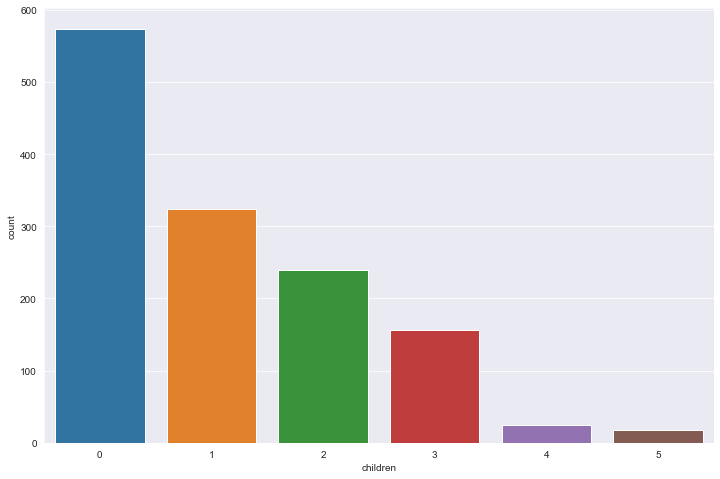

In [9]:
# Analisando as quantidades de crianças:

sns.set_style( "darkgrid" )

plt.tight_layout()

fig = plt.figure( figsize = ( 12 , 8 ) )

sns.countplot( data = df_seguro , x = 'children' ,);

plt.show();

<Figure size 432x288 with 0 Axes>

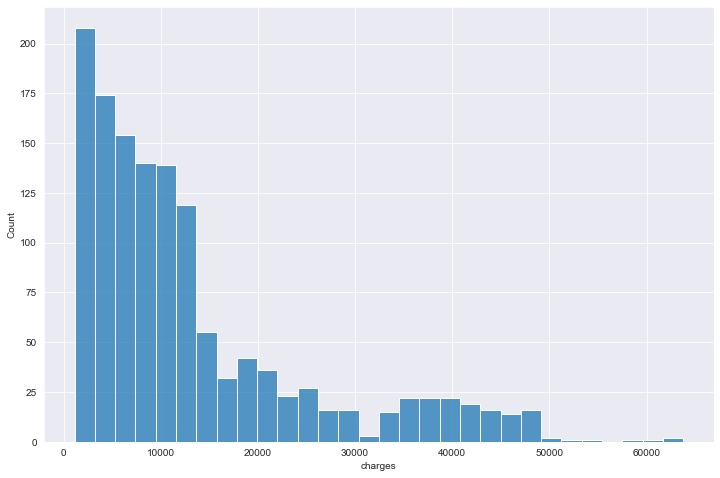

In [10]:
# Analisando a variável target: Valor do Seguro:

sns.set_style( "darkgrid" )

plt.tight_layout()

fig = plt.figure( figsize = ( 12 , 8 ) )

sns.histplot( data = df_seguro , x = 'charges');

plt.show();

# Relação entre as features e a variável target:

<Figure size 432x288 with 0 Axes>

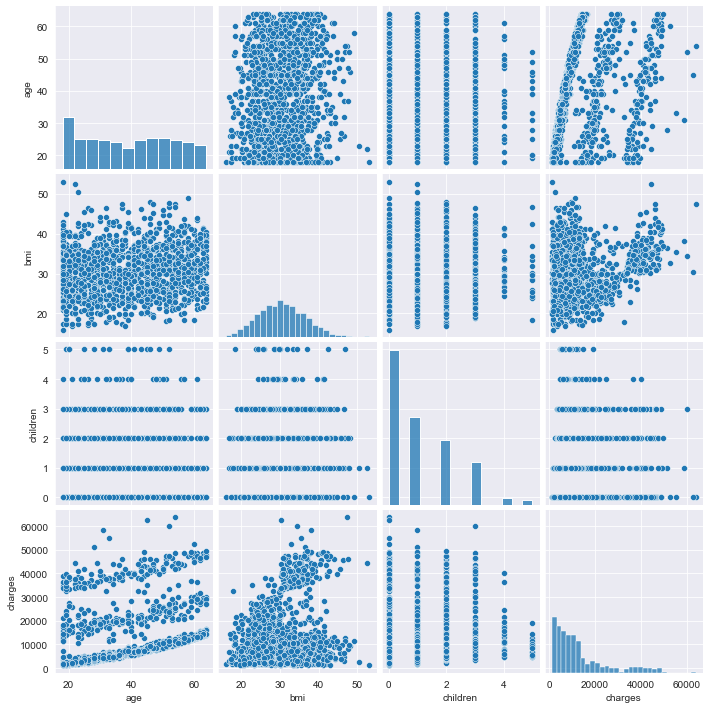

In [11]:
sns.set_style( "darkgrid" )

plt.tight_layout()

sns.pairplot(data=df_seguro)

plt.show();

Fica evidente uma correlação positiva entre idade e as cobranças de planos de saúde (age x charges). Provavelmente será uma variável de importância no modelo preditivo.

# Codificação de Variáveis Categóricas:

In [12]:
df_seguro['female'] = df_seguro['sex'].map( { 'female' : 1 , 'male' : 0} )
df_seguro['smoker'] = df_seguro['smoker'].map( { 'yes' : 1 , 'no' : 0} )
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges,female
0,19,female,27.90,0,1,southwest,16884.92,1
1,18,male,33.77,1,0,southeast,1725.55,0
2,28,male,33.00,3,0,southeast,4449.46,0
3,33,male,22.70,0,0,northwest,21984.47,0
4,32,male,28.88,0,0,northwest,3866.86,0


In [13]:
df_seguro = df_seguro.drop('sex' , axis = 1)

In [14]:
df_seguro['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
colunas_regiao = pd.get_dummies(df_seguro['region'] , drop_first = True)
colunas_regiao.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [16]:
pd.concat( [df_seguro , colunas_regiao] , axis = 1).head()

,age,bmi,children,smoker,region,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,1,0,0,1
1,18,33.77,1,0,southeast,1725.55,0,0,1,0
2,28,33.00,3,0,southeast,4449.46,0,0,1,0
3,33,22.70,0,0,northwest,21984.47,0,1,0,0
4,32,28.88,0,0,northwest,3866.86,0,1,0,0


In [17]:
df_seguro = pd.concat( [ df_seguro , colunas_regiao ] , axis = 1 )
df_seguro = df_seguro.drop( 'region' , axis = 1)
df_seguro.head()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,0,0,1
1,18,33.77,1,0,1725.55,0,0,1,0
2,28,33.00,3,0,4449.46,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,0
4,32,28.88,0,0,3866.86,0,1,0,0


# Variáveis Preditoras e Variável Resposta:

In [18]:
x = df_seguro.drop( 'charges' , axis = 1)
y = df_seguro[['charges']]

In [19]:
# Variáveis preditoras.

x.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
0,19,27.90,0,1,1,0,0,1
1,18,33.77,1,0,0,0,1,0
2,28,33.00,3,0,0,0,1,0
3,33,22.70,0,0,0,1,0,0
4,32,28.88,0,0,0,1,0,0


In [20]:
# Variável Resposta.

y.head()

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


# Separação de Bases:

In [21]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, 
                                                        y, 
                                                        test_size = .2,
                                                        random_state = 42)

In [22]:
x_treino.shape , x_teste.shape , y_treino.shape , y_teste.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

# Feature Scaling:

In [23]:
df_seguro.describe()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,0.20,13270.42,0.49,0.24,0.27,0.24
std,14.05,6.10,1.21,0.40,12110.01,0.50,0.43,0.45,0.43
min,18.00,15.96,0.00,0.00,1121.87,0.00,0.00,0.00,0.00
25%,27.00,26.30,0.00,0.00,4740.29,0.00,0.00,0.00,0.00
50%,39.00,30.40,1.00,0.00,9382.03,0.00,0.00,0.00,0.00
75%,51.00,34.69,2.00,0.00,16639.91,1.00,0.00,1.00,0.00
max,64.00,53.13,5.00,1.00,63770.43,1.00,1.00,1.00,1.00


In [24]:
scaler = MinMaxScaler()

In [25]:
colunas = x_treino.columns

x_treino[colunas] = scaler.fit_transform(x_treino)
x_teste[colunas] = scaler.transform(x_teste)

x_treino.shape , x_teste.shape

((1070, 8), (268, 8))

In [26]:
x_treino.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.49,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [27]:
x_teste.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.52,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


# Correlação entre variáveis:

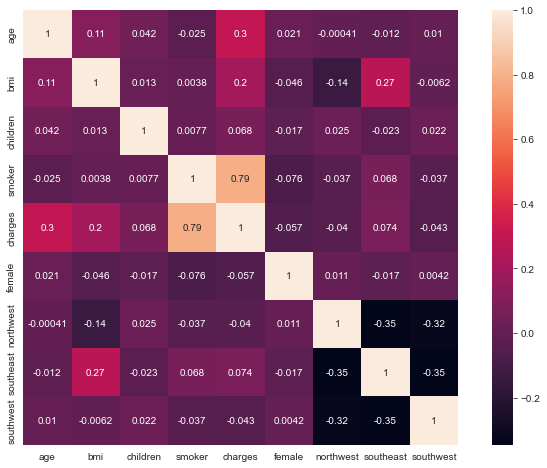

In [28]:
figura , graficos = plt.subplots( figsize = ( 12 , 8 ) )

corr = df_seguro.corr()

sns.heatmap( corr , mask = np.zeros_like( corr, dtype = bool ) ,
             square = True , ax = graficos , annot = True);

# Dados Faltantes:

In [29]:
df_seguro.isnull().sum()

age          0
bmi          0
children     0
smoker       0
charges      0
female       0
northwest    0
southeast    0
southwest    0
dtype: int64

# Machine Learning:

## Regressão Linear:

In [30]:
regressao_linear = LinearRegression()

valores_rmse_rl = cross_val_score(estimator=regressao_linear,
                                  X=x_treino,
                                  y=y_treino,
                                  cv=10,
                                  scoring='neg_root_mean_squared_error')
valores_rmse_rl

array([-6073.99997254, -6580.87166754, -5233.82683473, -6045.25239632,
       -5836.4647871 , -6127.43525895, -7281.08373608, -6321.52706355,
       -6193.3145481 , -5637.06299714])

In [31]:
valores_rmse_rl = valores_rmse_rl * -1
valores_rmse_rl

array([6073.99997254, 6580.87166754, 5233.82683473, 6045.25239632,
       5836.4647871 , 6127.43525895, 7281.08373608, 6321.52706355,
       6193.3145481 , 5637.06299714])

In [32]:
rmse_rl_media = valores_rmse_rl.mean()
rmse_rl_media

6133.0839262055

## Árvore de Regrassão:

In [33]:
arvore_regressao = DecisionTreeRegressor()

valores_rmse_arvore = cross_val_score(estimator=arvore_regressao,
                                      X=x_treino,
                                      y=y_treino,
                                      cv=10,
                                      scoring='neg_root_mean_squared_error')
valores_rmse_arvore

array([-6355.50460704, -7595.4237415 , -6945.26906274, -6637.08962554,
       -6847.92393717, -6121.31658194, -7252.94208909, -7014.8410258 ,
       -6635.56204589, -6215.65435157])

In [34]:
valores_rmse_arvore = valores_rmse_arvore * -1
valores_rmse_arvore

array([6355.50460704, 7595.4237415 , 6945.26906274, 6637.08962554,
       6847.92393717, 6121.31658194, 7252.94208909, 7014.8410258 ,
       6635.56204589, 6215.65435157])

In [35]:
rmse_arvore_media = valores_rmse_arvore.mean()
rmse_arvore_media

6762.152706828696

# Remoção de Colunas:

## Regressão Linear:

In [36]:
colunas_regiao = ['northwest' , 'southeast' , 'southwest' ]

In [37]:
regressao_linear = LinearRegression()

valores_rmse_rl_sem_regiao = cross_val_score(estimator=regressao_linear,
                                  X=x_treino.drop( colunas_regiao , axis=1),
                                  y=y_treino,
                                  cv=10,
                                  scoring='neg_root_mean_squared_error')

valores_rmse_rl_sem_regiao = valores_rmse_rl_sem_regiao * -1
valores_rmse_rl_sem_regiao

array([6047.74861144, 6576.17442833, 5208.18399508, 5969.09583538,
       5870.19697933, 6107.50898187, 7295.03885205, 6309.72867769,
       6178.86188095, 5652.91238386])

In [38]:
rmse_rl_sem_regiao_media = valores_rmse_rl_sem_regiao.mean()
rmse_rl_sem_regiao_media

6121.545062597132

## Árvore de Regrassão:

In [39]:
arvore_regressao = DecisionTreeRegressor()

valores_rmse_arvore_sem_regiao = cross_val_score(estimator=arvore_regressao,
                                      X=x_treino.drop( colunas_regiao , axis=1),
                                      y=y_treino,
                                      cv=10,
                                      scoring='neg_root_mean_squared_error')
valores_rmse_arvore_sem_regiao

array([-6227.04978334, -6811.43191716, -6416.28172556, -6813.25126168,
       -7349.48337613, -6798.24477082, -7762.19869136, -7338.32118542,
       -6822.31025741, -6187.8443904 ])

In [40]:
rmse_arvore_sem_regiao_media = valores_rmse_arvore_sem_regiao.mean() * -1

In [41]:
rmse_arvore_sem_regiao_media

6852.64173592684

## Comparação:

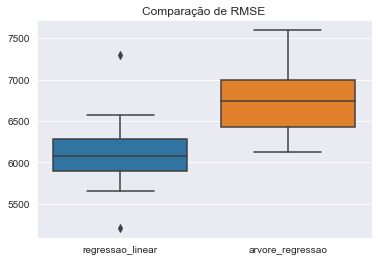

In [42]:
rmse = pd.DataFrame({'regressao_linear': valores_rmse_rl_sem_regiao, 'arvore_regressao' : valores_rmse_arvore})

sns.boxplot( data = rmse).set_title('Comparação de RMSE');

# Modelo Escolhido:

In [43]:
regressao_linear.fit(x_treino.drop(colunas_regiao , axis = 1) , y_treino)

LinearRegression()

In [44]:
regressao_linear.coef_

array([[1.18251723e+04, 1.21744207e+04, 2.13627215e+03, 2.36539033e+04,
        7.95178837e+00]])

In [45]:
df_coeficientes = pd.DataFrame( regressao_linear.coef_ )
df_coeficientes.columns = regressao_linear.feature_names_in_
df_coeficientes

,age,bmi,children,smoker,female
0,11825.17,12174.42,2136.27,23653.90,7.95


In [46]:
rl_statsmodels = sm.OLS( y_treino , x_treino.drop( colunas_regiao , axis = 1 ) )
resultado_fit = rl_statsmodels.fit()
p_valores = resultado_fit.summary2().tables[1]['P>|t|']
p_valores

age        0.00
bmi        0.00
children   0.07
smoker     0.00
female     0.21
Name: P>|t|, dtype: float64

Os coeficientes para **crianças** e **sexo** não são estatisticamente válidos, devemos ter cautela ao analisar o impacto nos valores do plano de saúde. Mas **idade, índice de massa corporal** e se a pessoa fuma ou não são relevantes.

# Base de Teste:

In [47]:
precos_preditos = regressao_linear.predict(x_teste.drop(colunas_regiao , axis = 1))
precos_preditos[:5]

array([[ 8554.81711589],
       [ 6973.58746745],
       [36798.60416104],
       [ 9417.88282303],
       [26871.68031081]])

In [48]:
y_teste.head()

,charges
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [49]:
predicoes_vs_real = pd.DataFrame({'predicao' : precos_preditos.flatten() , 'real' : y_teste.values.flatten() })
predicoes_vs_real['diferenca_abs'] = abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])

In [50]:
predicoes_vs_real.head(20)

,predicao,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


In [51]:
r2_score(y_true = y_teste , y_pred = precos_preditos) * 100 

78.11302113434095

# Teste - Inputs de Dados:

In [52]:
x_treino.drop( colunas_regiao , axis = 1 ).columns

Index(['age', 'bmi', 'children', 'smoker', 'female'], dtype='object')

In [53]:
idade = input()

25


In [54]:
indice_massa_corporal = input()

25


In [55]:
criancas = input()

0


In [56]:
fumante = input('1 para fumante, 0 para não fumante: ')

1 para fumante, 0 para não fumante: 0


In [57]:
sexo = input('1 para mulher, 0 para homem: ')

1 para mulher, 0 para homem: 0


In [58]:
# Realizando Scaling das Features:

# scaler_sem_regiao = MinMaxScaler()
# scaler_sem_regiao.fit( x_treino.drop( colunas_regiao , axis = 1 ) )

# Completamos com 1,1,1 porque o x_treino original tinha colunas de regiao:

features = [[idade, indice_massa_corporal, criancas, fumante, sexo, 1, 1, 1]]

# O scaler é lá do treino (nada de fitar de novo):

features = scaler.transform(features)
features

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.15217391, 0.24320689, 0.        , 0.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [59]:
# Pegando somente as 5 features:

features = features[ : , : -3]
features

array([[0.15217391, 0.24320689, 0.        , 0.        , 0.        ]])

In [71]:
# Resultado da predição:

valor = regressao_linear.predict(features)

print('Valor do Seguro: R$' , valor , '( Ano ) ')

Valor do Seguro: R$ [[2493.65885607]] ( Ano ) 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
